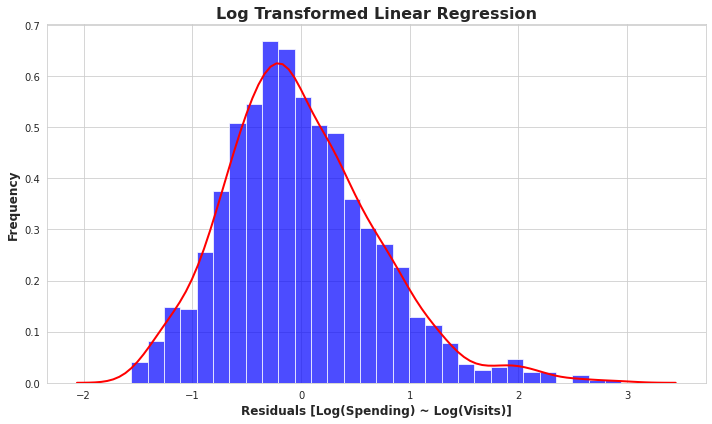

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


file_path = "usaSmall.csv"
df = pd.read_csv(file_path)

# Filter data and transform for normalization
df = df[['Visits (000s)', 'Spend']].dropna()
df['Log_Visits'] = np.log1p(df['Visits (000s)'])
df['Log_Spend'] = np.log1p(df['Spend'])


X = df['Log_Visits'].values.reshape(-1, 1)  # Exp. var
y = df['Log_Spend'].values  # Res. var


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


residuals = y - y_pred


sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.distplot(residuals, bins=30, color="blue", kde=True, hist_kws={'alpha': 0.7}, kde_kws={'color': 'red', 'linewidth': 2})
plt.title("Log Transformed Linear Regression", fontsize=16, fontweight='bold')
plt.xlabel("Residuals [Log(Spending) ~ Log(Visits)]", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()
